In [34]:
#importing the libraries
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import importlib
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

In [71]:
sys.path.append(os.path.abspath("../utils")) 
from indicators import calculate_RSI, calculate_MACD, calculate_SuperTrend  # type: ignore

In [79]:
# Load Data
data = pd.read_csv("C:\\Users\\vamsi\\OneDrive\\Desktop\\Documents\\studies\\complete stock market predictor\\Stock-Market-Predictor\\project_root\\data\\processed_data.csv")

In [74]:
data.head()

,time,open,high,low,close,tick_volume,spread,real_volume,H-L,H-PC,L-PC,TR,ATR,result
0,2025-01-28 14:00:00,2748.979,2751.374,2748.956,2751.020,3068,0,0,2.418,NaN,NaN,2.418,NaN,Hold
1,2025-01-28 14:15:00,2750.979,2754.695,2750.074,2754.007,3240,0,0,4.621,3.675,0.946,4.621,NaN,Hold
2,2025-01-28 14:30:00,2754.041,2756.416,2752.980,2753.700,6339,0,0,3.436,2.409,1.027,3.436,NaN,Hold
3,2025-01-28 14:45:00,2753.669,2755.886,2753.263,2753.616,4654,0,0,2.623,2.186,0.437,2.623,NaN,Hold
4,2025-01-28 15:00:00,2753.647,2755.467,2751.144,2755.258,4426,0,0,4.323,1.851,2.472,4.323,NaN,Hold


In [75]:
data['result'].value_counts()

result
Buy     4073
Sell    3849
Hold    3279
Name: count, dtype: int64

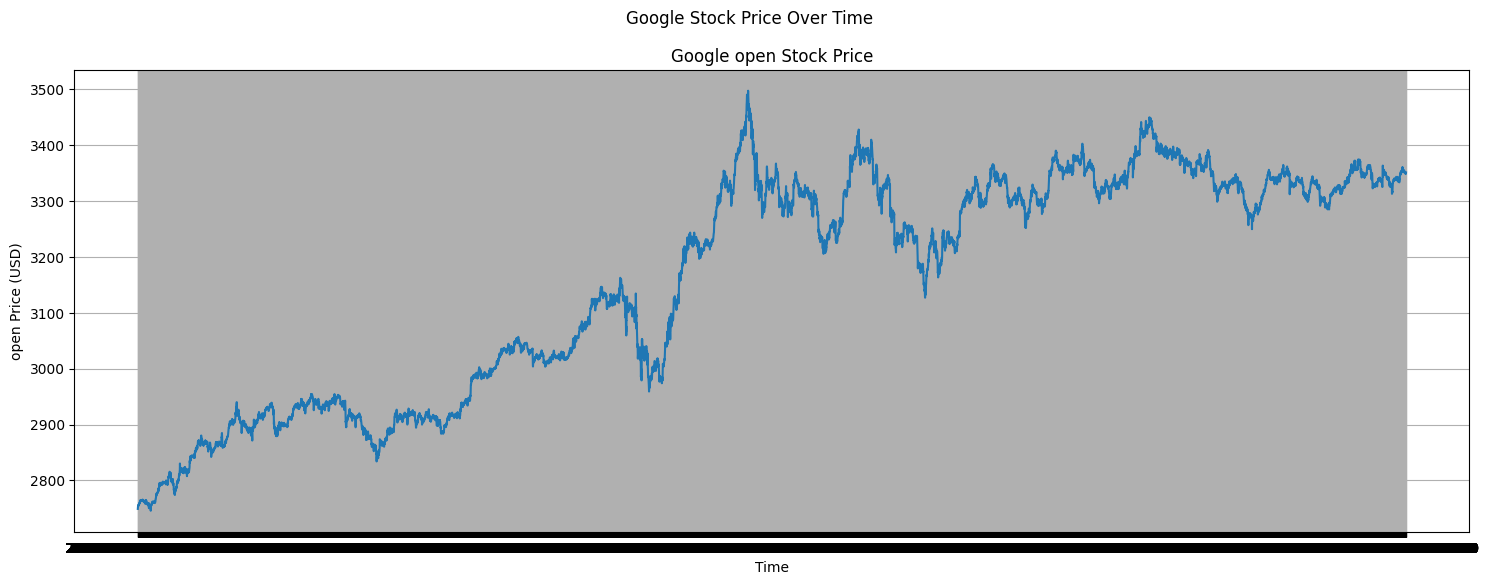

In [76]:
# Plot open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.plot(data["time"], data["open"])
plt.xlabel("Time")
plt.ylabel("open Price (USD)")
plt.title("Google open Stock Price")
plt.grid()

plt.suptitle("Google Stock Price Over Time")
plt.show()

In [80]:
# Drop unwanted columns early
data.drop(["H-L", "H-PC", "L-PC", "TR", "spread"], axis=1, inplace=True)



# Apply Indicator Functions
data = calculate_SuperTrend(data)
data = calculate_RSI(data)
data = calculate_MACD(data)
data['EMA_21'] = data['close'].ewm(span=21, adjust=False).mean()
# Parse time and create time-based features
data['time'] = pd.to_datetime(data['time'])
data['Day of the week'] = data['time'].dt.dayofweek
data['Is Weekend'] = data['time'].dt.dayofweek >= 4
data['Month'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour

HELLO


## Univariate Analysis

### 1.SuperTrend

In [81]:
#Super Trend
data['Supertrend_Direction'].value_counts()

Supertrend_Direction
 1    5918
-1    5283
Name: count, dtype: int64

### 2.RSI 

In [13]:
#RSI
data['RSI'].describe()

count    11188.000000
mean        52.016231
std         12.442210
min         13.414562
25%         43.604986
50%         51.905290
75%         60.491122
max         89.643635
Name: RSI, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

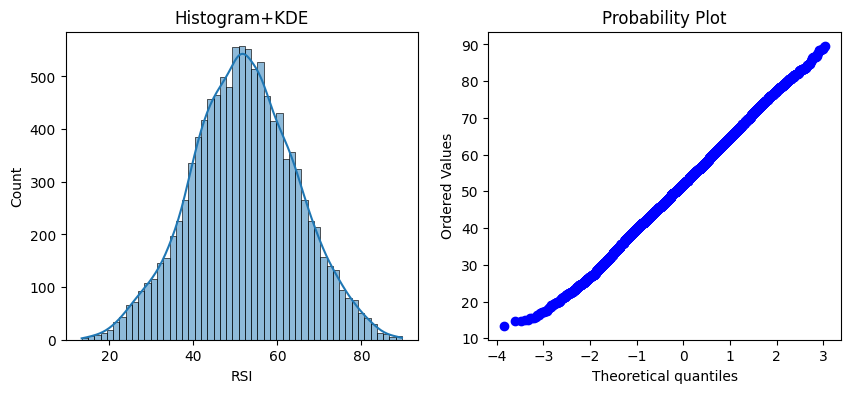

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data['RSI'], kde=True, ax=ax[0])
ax[0].set_title("Histogram+KDE")

stats.probplot(data['RSI'],dist='norm',plot=ax[1])
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['EMA_21_scaled'] = scaler.fit_transform(data[['EMA_21']])

### 3.ATR

In [16]:
data['ATR'].describe

<bound method NDFrame.describe of 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
11196    2.158786
11197    2.016929
11198    1.856786
11199    1.927286
11200    1.927357
Name: ATR, Length: 11201, dtype: float64>

Text(0.5, 1.0, 'QQ-Plot')

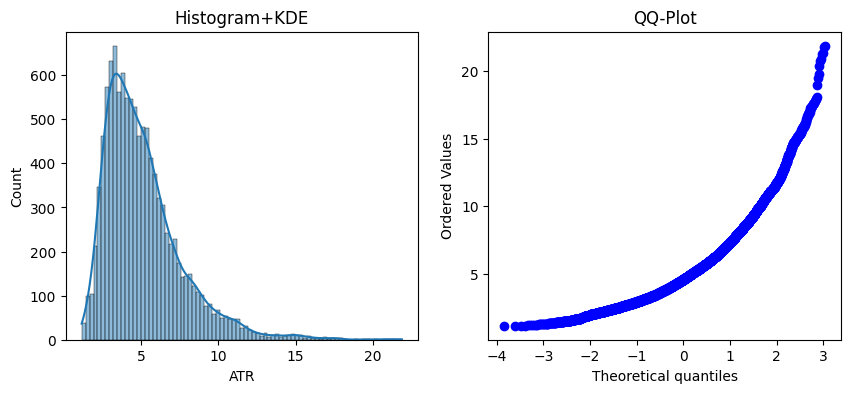

In [17]:
#ATR
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data['ATR'], kde=True, ax=ax[0])
ax[0].set_title("Histogram+KDE")

stats.probplot(data['ATR'],dist='norm',plot=ax[1])
ax[1].set_title("QQ-Plot")

((array([-3.8385532 , -3.61494636, -3.49225571, ...,  3.49225571,
          3.61494636,  3.8385532 ], shape=(11201,)),
  array([0.77656879, 0.78020915, 0.78096181, ...,        nan,        nan,
                nan], shape=(11201,))),
 (np.float64(nan), np.float64(nan), np.float64(nan)))

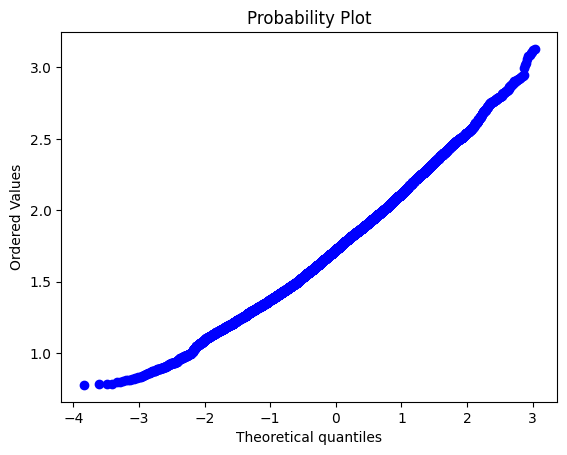

In [20]:
stats.probplot(data_new,dist='norm',plot=plt)

### 4.MACD

In [21]:
#MACD
data['MACD'].describe()

count    11176.000000
mean         0.372768
std          4.369604
min        -21.442330
25%         -1.758332
50%          0.496360
75%          2.654883
max         16.111468
Name: MACD, dtype: float64

Text(0.5, 1.0, 'QQ-Plot')

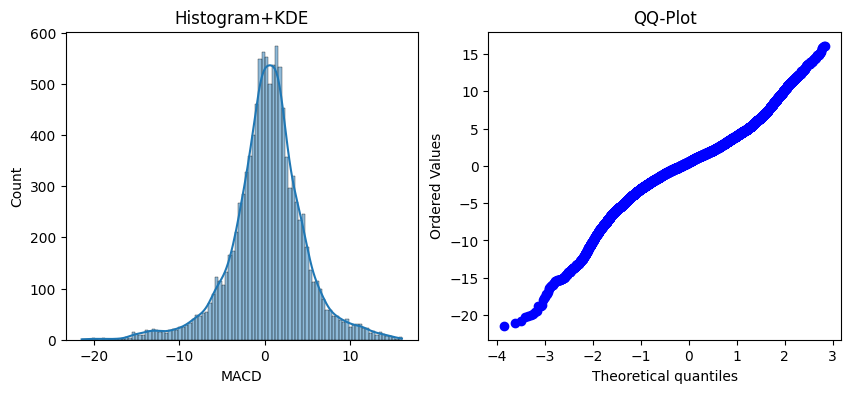

In [22]:
#MACD
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data['MACD'], kde=True, ax=ax[0])
ax[0].set_title("Histogram+KDE")

stats.probplot(data['MACD'],dist='norm',plot=ax[1])
ax[1].set_title("QQ-Plot")

### 5.Day of the Week

In [23]:
data['Day of the week'].value_counts()

Day of the week
2    2300
3    2276
1    2244
0    2186
4    2023
6     172
Name: count, dtype: int64

In [24]:
#is weekend
data['Is Weekend'].value_counts()

Is Weekend
False    9006
True     2195
Name: count, dtype: int64

### Outlier Detection

In [46]:
data.dropna(inplace=True)

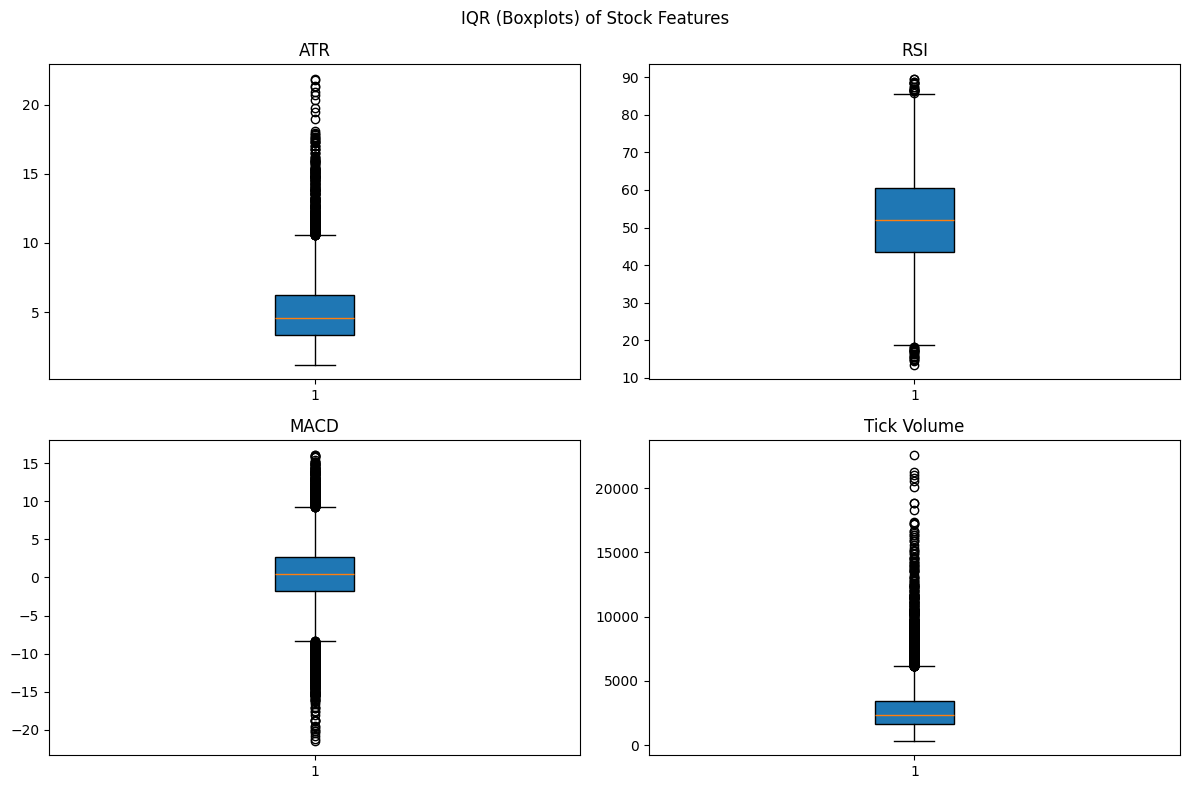

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# 1st subplot
plt.subplot(2,2,1)
plt.boxplot(data["ATR"], vert=True, patch_artist=True)
plt.title("ATR")

# 2nd subplot
plt.subplot(2,2,2)
plt.boxplot(data["RSI"], vert=True, patch_artist=True)
plt.title("RSI")

# 3rd subplot
plt.subplot(2,2,3)
plt.boxplot(data["MACD"], vert=True, patch_artist=True)
plt.title("MACD")

# 4th subplot
plt.subplot(2,2,4)
plt.boxplot(data["tick_volume"], vert=True, patch_artist=True)
plt.title("Tick Volume")

plt.suptitle("IQR (Boxplots) of Stock Features")
plt.tight_layout()
plt.show()


## Bivariate Analysis

<Axes: xlabel='Day of the week', ylabel='count'>

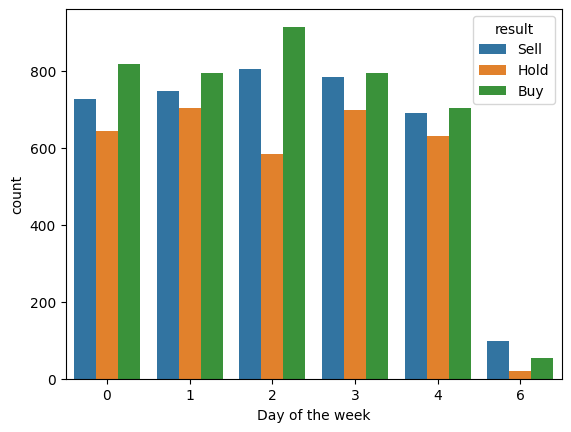

In [25]:
sns.countplot(x=data['Day of the week'],hue=data['result'])

<Axes: xlabel='Is Weekend', ylabel='count'>

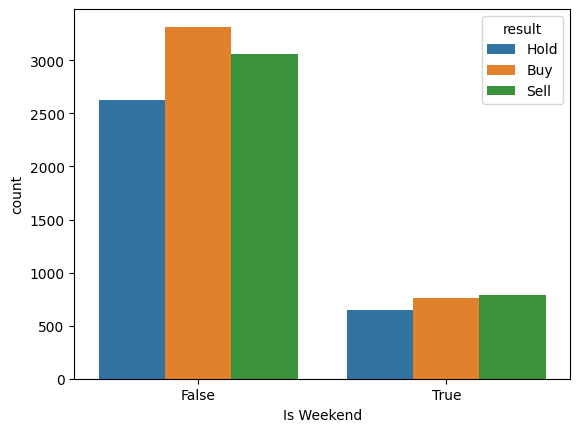

In [26]:
sns.countplot(x=data['Is Weekend'],hue=data['result'])

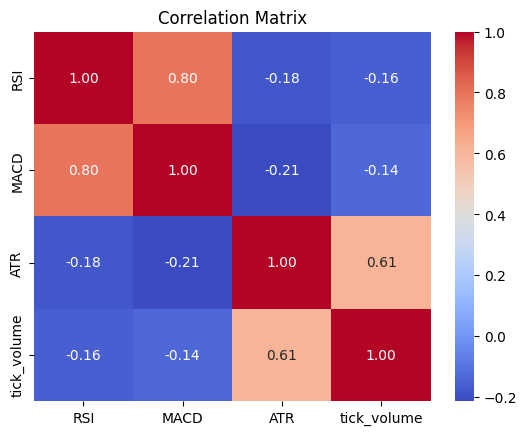

In [27]:
# Correlation matrix for selected features
corr_matrix = data[['RSI', 'MACD', 'ATR', 'tick_volume']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [28]:
data['hour']=data['time'].dt.hour

In [30]:
hourly_volume = data.groupby('hour')['tick_volume'].mean()


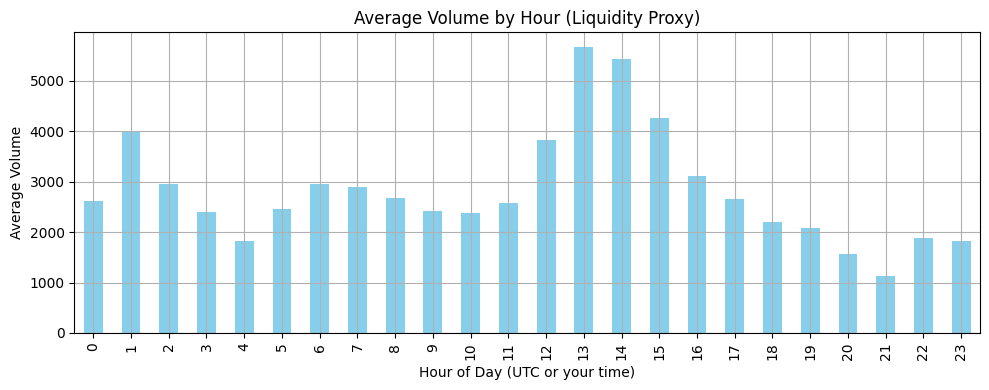

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
hourly_volume.plot(kind='bar', color='skyblue')
plt.title("Average Volume by Hour (Liquidity Proxy)")
plt.xlabel("Hour of Day (UTC or your time)")
plt.ylabel("Average Volume")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
data['tick_volume'].mean()

np.float64(2895.800464244264)

In [82]:
data

,time,open,high,low,close,tick_volume,real_volume,ATR,result,Supertrend_Direction,RSI,MACD,MACD_signal,MACD_diff,EMA_21,Day of the week,Is Weekend,Month,hour
0,2025-01-28 14:00:00,2748.979,2751.374,2748.956,2751.020,3068,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2751.020000,1,False,28,14
1,2025-01-28 14:15:00,2750.979,2754.695,2750.074,2754.007,3240,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2751.291545,1,False,28,14
2,2025-01-28 14:30:00,2754.041,2756.416,2752.980,2753.700,6339,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2751.510496,1,False,28,14
3,2025-01-28 14:45:00,2753.669,2755.886,2753.263,2753.616,4654,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2751.701905,1,False,28,14
4,2025-01-28 15:00:00,2753.647,2755.467,2751.144,2755.258,4426,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2752.025187,1,False,28,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11196,2025-07-18 19:45:00,3349.397,3349.820,3347.748,3348.396,1276,0,2.158786,Hold,-1,36.676534,-0.891610,-0.389349,-0.502261,3351.838598,4,True,18,19
11197,2025-07-18 20:00:00,3348.359,3350.401,3347.884,3350.026,894,0,2.016929,Buy,-1,43.561901,-0.908368,-0.493153,-0.415216,3351.673817,4,True,18,20
11198,2025-07-18 20:15:00,3350.019,3350.655,3349.391,3349.900,683,0,1.856786,Hold,-1,43.171129,-0.921198,-0.578762,-0.342436,3351.512561,4,True,18,20
11199,2025-07-18 20:30:00,3349.969,3351.625,3349.078,3351.142,715,0,1.927286,Hold,-1,48.112163,-0.821675,-0.627344,-0.194330,3351.478873,4,True,18,20


In [83]:
# Create custom liquidity feature
high_liquidity_hours = [13, 14, 1, 12]
data['high_liquidity'] = data['hour'].isin(high_liquidity_hours).astype(int)

In [84]:
data

,time,open,high,low,close,tick_volume,real_volume,ATR,result,Supertrend_Direction,RSI,MACD,MACD_signal,MACD_diff,EMA_21,Day of the week,Is Weekend,Month,hour,high_liquidity
0,2025-01-28 14:00:00,2748.979,2751.374,2748.956,2751.020,3068,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2751.020000,1,False,28,14,1
1,2025-01-28 14:15:00,2750.979,2754.695,2750.074,2754.007,3240,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2751.291545,1,False,28,14,1
2,2025-01-28 14:30:00,2754.041,2756.416,2752.980,2753.700,6339,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2751.510496,1,False,28,14,1
3,2025-01-28 14:45:00,2753.669,2755.886,2753.263,2753.616,4654,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2751.701905,1,False,28,14,1
4,2025-01-28 15:00:00,2753.647,2755.467,2751.144,2755.258,4426,0,NaN,Hold,1,NaN,NaN,NaN,NaN,2752.025187,1,False,28,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11196,2025-07-18 19:45:00,3349.397,3349.820,3347.748,3348.396,1276,0,2.158786,Hold,-1,36.676534,-0.891610,-0.389349,-0.502261,3351.838598,4,True,18,19,0
11197,2025-07-18 20:00:00,3348.359,3350.401,3347.884,3350.026,894,0,2.016929,Buy,-1,43.561901,-0.908368,-0.493153,-0.415216,3351.673817,4,True,18,20,0
11198,2025-07-18 20:15:00,3350.019,3350.655,3349.391,3349.900,683,0,1.856786,Hold,-1,43.171129,-0.921198,-0.578762,-0.342436,3351.512561,4,True,18,20,0
11199,2025-07-18 20:30:00,3349.969,3351.625,3349.078,3351.142,715,0,1.927286,Hold,-1,48.112163,-0.821675,-0.627344,-0.194330,3351.478873,4,True,18,20,0


In [85]:
data.to_csv("C:/Users/vamsi/OneDrive/Desktop/Documents/studies/complete stock market predictor/Stock-Market-Predictor/project_root/data/Analysed_and_enhanced_data.csv", index=False)